In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0,1], [0, -6]])
B = np.array([0,1])
x_0 = np.array([0,0])
x_k = np.array([1,0])

In [87]:
u = lambda psi: 4*np.sign(psi)

In [4]:
def get_psi_1(c):
    def psi_1(t):
        return c;
    return psi_1

In [5]:
def get_psi_2(c):
    def psi_2(t):
        return c/6 + (0.25 - c/6)*np.exp(6*t)
    return psi_2

In [6]:
from scipy.integrate import odeint
from tqdm import tqdm

## Task 1

In [75]:
init_cond = [0, 0]
t_end = 5
n = 1000
t_eval = np.linspace(0, t_end, n+1)
dt = 0.01
tolerance = 0.001

In [73]:
# sol = odeint(system_full, init_cond, t_eval)

In [89]:
C_curr = 20
C_best = C_curr
dC = 1
max_iterations = 100
C_sup = -1
C_inf = 1.5
last_rk_iter = None
sol = None

In [90]:
for iter in range(max_iterations):
    n = 1000
    sol = np.zeros((n, 2))
    x = init_cond
    last_rk_iter = n-1
    found = False
    psi_2 = get_psi_2(C_curr)
    def system_full(x, t):
        return np.array(A @ x + B * u(psi_2(t)))
    sol = odeint(system_full, init_cond, np.arange(0, n*dt, dt))
    for i in range(n):
        if sol[i,1] < 0:
            last_rk_iter = i
            found = True
            break

    if iter:
        print(f'C = {C_curr:5}.\t x0 = {sol[last_rk_iter,0]:5} \t x1 = {sol[last_rk_iter,1]:5}')
    if abs(sol[last_rk_iter,0] - 1) < tolerance:
        C_best = C_curr
        break
    if sol[last_rk_iter,0] > 1:
        C_inf = C_curr
        if C_sup < 0:
            C_curr += dC
        else:
            C_curr = (C_inf + C_sup) * 0.5
    else:
        C_sup = C_curr
        C_curr = (C_inf + C_sup) * 0.5


C = 10.75.	 x0 = 0.041279877539870204 	 x1 = -0.03866441760571931
C = 6.125.	 x0 = 0.35643548744945913 	 x1 = -0.029519194447216256
C = 3.8125.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 4.96875.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 5.546875.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 5.8359375.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 5.98046875.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 6.052734375.	 x0 = 0.45042466592331987 	 x1 = -0.0185508101330766
C = 6.0166015625.	 x0 = 0.5778772939533632 	 x1 = -0.010222435722842212
C = 5.99853515625.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 6.007568359375.	 x0 = 0.6649138934833412 	 x1 = -0.007084693147333662
C = 6.0030517578125.	 x0 = 0.7657120666225915 	 x1 = -0.0018650973613785066
C = 6.00079345703125.	 x0 = 0.9152538314811157 	 x1 = -0.02351916360529687
C = 5.999664306640625.	 x0 = 6.548888888888367 	 x1 = 0.666666666669799
C = 6.0002288818359375.	 x0 = 1.05328956167504

In [91]:
C_best

6.000370025634766

In [92]:
_psi_2 = get_psi_2(C_best)

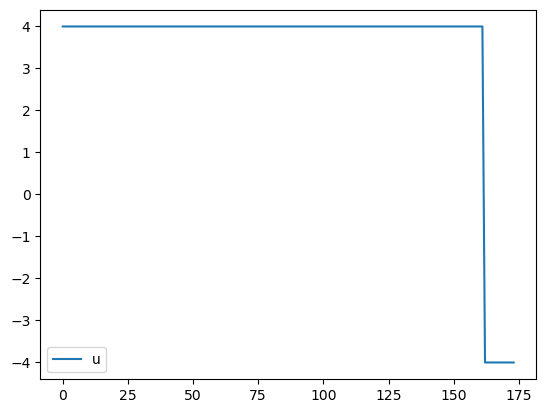

In [101]:
plt.plot(u(_psi_2(np.arange(0, last_rk_iter*dt, dt))), label='u')
plt.legend()
plt.show()

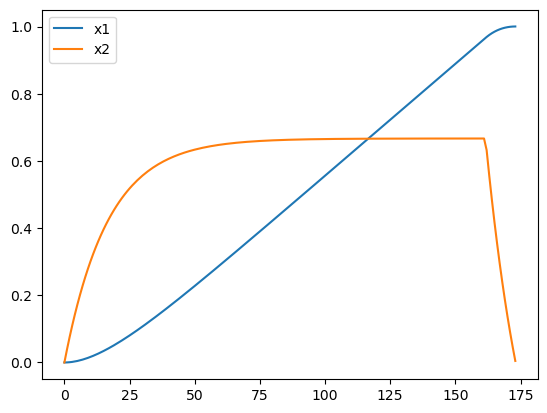

In [99]:
plt.plot(sol[:last_rk_iter,], label=['x1','x2'])
plt.legend()
plt.show()

## Task 2

\*магические манипуляции с формулами у меня в тетради\*

$u = 4$

$
x_1 = \frac{1}{4}[-\frac{2}{3}x_2 - ln|\frac{2}{3} x_2 - 1|] + k_1
$

$
k_1 = x_1(0) + \frac{1}{4}[\frac{2}{3} x_2(0) + ln|\frac{2}{3} x_2(0) - 1|]
$
__________
$u = -4$

$
x_1 = \frac{1}{4}[-\frac{2}{3}x_2 + ln|\frac{2}{3} x_2 + 1|] + k_2
$

$
k_2 = x_1(0) + \frac{1}{4}[\frac{2}{3} x_2(0) - ln|\frac{2}{3} x_2(0) + 1|]
$

In [140]:
def get_phase_pos(k):
    def x_1(x_2):
        return -x_2/6 - 0.25 *np.log(np.abs(x_2/1.5 - 1)) + k
    return x_1

def get_phase_neg(k):
    def x_1(x_2):
        return -x_2/6 + 0.25 *np.log(np.abs(x_2/1.5 + 1)) + k
    return x_1

In [141]:
k_arr = [0, 0.5, 1]

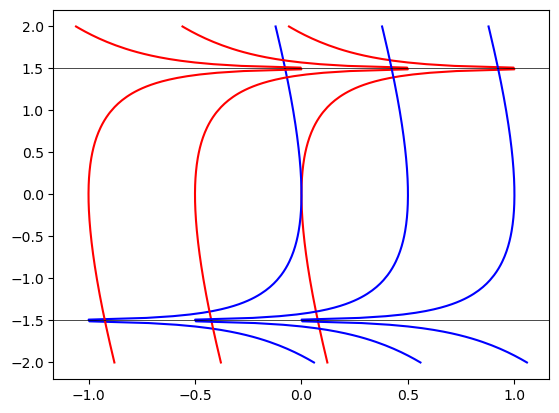

In [142]:
for k in k_arr:
    x_2 = np.concatenate([np.linspace(-2, 1, 150)[:-1], np.linspace(1, 2, 50)[1:]])
    x_1_foo = get_phase_pos(-k)
    plt.plot(x_1_foo(x_2), x_2, 'r')

    x_2 = np.concatenate([np.linspace(-2, -1, 50)[:-1], np.linspace(-1, 2, 150)[1:]])
    x_1_foo = get_phase_neg(k)
    plt.plot(x_1_foo(x_2), x_2, 'b')
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.axhline(y=1.5, color='k', lw=0.5)
plt.axhline(y=-1.5, color='k', lw=0.5)
plt.show()